<a href="https://colab.research.google.com/github/Thiru2208/Telco-Customer-Churn-ML-Coursework/blob/main/2425449_20241152_Thirusha_Kannathasan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries and load data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Make platos look a bit nicer by default
sns.set(style = "whitegrid")

#Load the Telco churn dataset
df = pd.read_csv("/content/drive/MyDrive/ML Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

#Quick peek at the first few records
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Basic structure: shape, info, summary

In [3]:
#Overall size of the dataset (rows, columns)
print("Shape of the dataset:", df.shape)

Shape of the dataset: (7043, 21)


In [4]:
print("\nDataFrame Info")
print(df.info())


DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non

In [5]:
print("\nDescriptive stats (numeric columns)")
print(df.describe())


Descriptive stats (numeric columns)
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


Check missing values and Total charges issue

In [6]:
#Count how many missing values apperar in each column
print("\n Missing values per colums")
print(df.isnull().sum())


 Missing values per colums
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
#TotalCharges sometimes has spaces intead of real numbers
blank_total_charges = (df["TotalCharges"].astype(str).str.strip() == "").sum()
print("\nRows where TotalCharges is blank (as string):", blank_total_charges)


Rows where TotalCharges is blank (as string): 11


Churn distribution

In [8]:
# Count how many customers fall into each class (Yes/No)
churn_counts = df["Churn"].value_counts()
print("\n--- Churn counts ---")
print(churn_counts)


--- Churn counts ---
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [9]:
# Percentage for each class
churn_pct = churn_counts / len(df) * 100
print("\n--- Churn percentage ---")
print(churn_pct)


--- Churn percentage ---
Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64


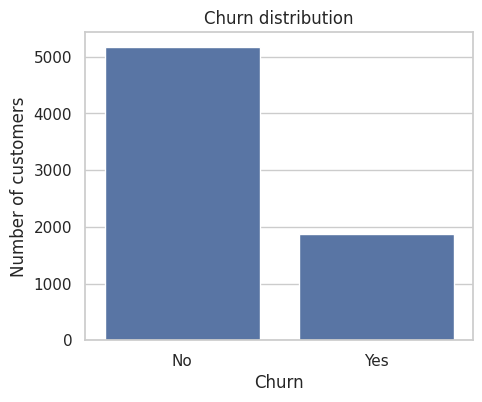

In [10]:
# Bar plot of churn variable
plt.figure(figsize=(5, 4))
sns.countplot(x="Churn", data=df)
plt.title("Churn distribution")
plt.xlabel("Churn")
plt.ylabel("Number of customers")
plt.show()

Numerical Fetaure Distributions

In [ ]:
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

plt.figure(figsize=(15,4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    df[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


Categorical Feature Distributions

In [ ]:
categorical_cols = [
    "gender", "SeniorCitizen", "Partner", "Dependents",
    "PhoneService", "MultipleLines", "InternetService",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaperlessBilling", "PaymentMethod"
]

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Churn Vs Contract Type

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=0)
plt.show()

Churn Vs Internet Service

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Churn by Internet Service Type")
plt.xticks(rotation=0)
plt.show()

Tenure vs Churn (Boxplot)

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure by Churn")
plt.show()

Simple correlation heatmap

In [ ]:
# Make sure TotalCharges is numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Optional: handle the new NaN values (for EDA, we can just drop them)
numeric_df = df[["tenure", "MonthlyCharges", "TotalCharges"]].dropna().copy()

plt.figure(figsize=(5, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues")
plt.title("Correlation heatmap (numeric features)")
plt.show()
